### Budget allocation proposal

This notebook holds the data analysis and text for the budget allocation problem, exemplifying a few concepts as well as doing basic analysis of invested cost and yielded sessions & revenue.

In [30]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

validDf = pd.read_csv("../data/valid_dataset_minimal_day1_2.csv")
campaigns = validDf["Campaign"].unique()
validDf["Date"] = pd.to_datetime(validDf["Date"])

print(validDf.head(10))

   Unnamed: 0       Date  Cost  Revenue Medium           Campaign  Sessions
0         329 2020-03-09  0.75      0.0    cpc   AW - Accessories         0
1         330 2020-03-09  0.93      0.0    cpc          AW - Bags         0
2         331 2020-03-09  0.72      0.0    cpc          AW - Bags         0
3         332 2020-03-09  5.31      0.0    cpc  AW - Google Brand        28
4         333 2020-03-09  0.25      0.0    cpc  AW - Google Brand         9
5         334 2020-03-09  1.45      0.0    cpc        AW - Office         0
6         335 2020-03-09  0.79      0.0    cpc        AW - Office         0
7         336 2020-03-09  0.91      0.0    cpc       AW - YouTube         0
8         359 2020-03-08  0.74      0.0    cpc   AW - Accessories         0
9         360 2020-03-08  0.68      0.0    cpc   AW - Accessories         0


### 1. Recap

Let's start with a plot from the first notebook, where, for each valid campaign, I plot the daily cost, number of sessions and revenue.

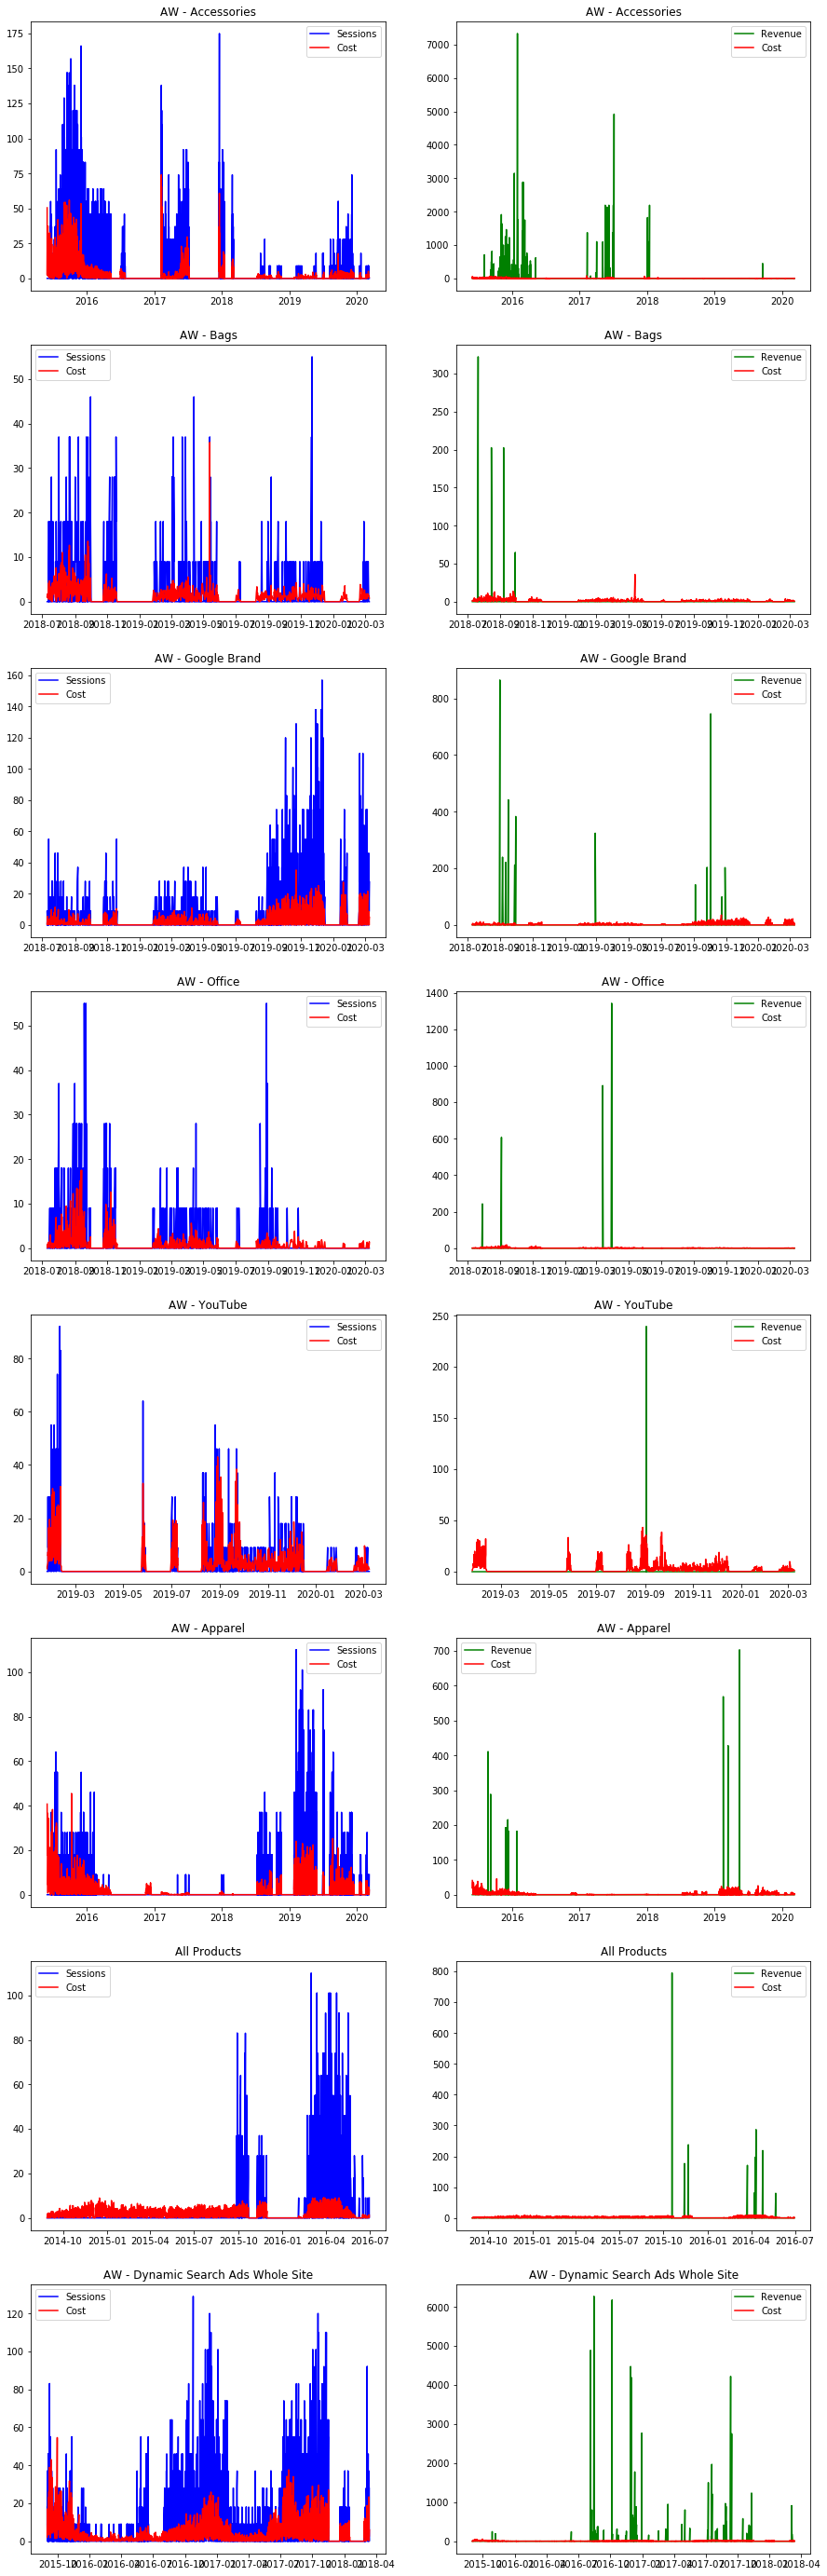

In [29]:
# Do a list of all dates between earliest and latest
nRows = len(campaigns)
ax = plt.subplots(nRows, 2, figsize=(15, 50))[1]

for i, campaign in enumerate(campaigns):
    dfRelevant = validDf[validDf["Campaign"] == campaign]
    dateRange = pd.DataFrame({
        "Date" : pd.date_range(dfRelevant["Date"].min(), dfRelevant["Date"].max(), freq="D"),
    })
    # Fill missing months by zeros
    dfRelevant = dateRange.set_index("Date").join(dfRelevant.set_index("Date")).fillna(0).reset_index()
    
    ax[i][0].plot(dfRelevant["Date"], dfRelevant["Sessions"], color="blue")
    ax[i][0].plot(dfRelevant["Date"], dfRelevant["Cost"], color="red")
    ax[i][0].set_title(campaign)
    ax[i][0].legend(["Sessions", "Cost"])

    ax[i][1].plot(dfRelevant["Date"], dfRelevant["Revenue"], color="green")
    ax[i][1].plot(dfRelevant["Date"], dfRelevant["Cost"], color="red")
    ax[i][1].set_title(campaign)
    ax[i][1].legend(["Revenue", "Cost"])

We see that, each campaign has some investment, and then that investment yields some user sessions and some revenue. However, we have no idea what investment is correlated to what change in revenue. The data only tells us daily information: how much we invested today